## State

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

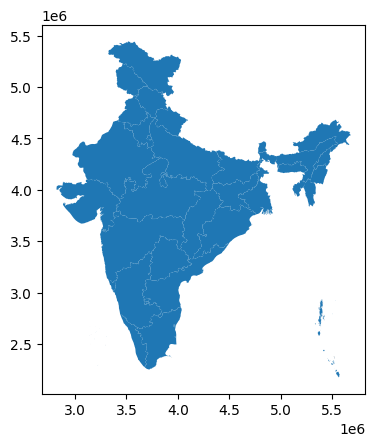

Total number of points in all geometries (including vertices of Polygons and LineStrings): 483982


In [55]:
# Load your shapefile
shapefile = gpd.read_file("State\STATE_BOUNDARY.shp")
shapefile.plot()
plt.show()
num_points_in_all = shapefile.geometry.apply(lambda geom: len(geom.coords) if geom.geom_type == 'Point' else len(geom.exterior.coords) if geom.geom_type == 'Polygon' else 0).sum()
print(f"Total number of points in all geometries (including vertices of Polygons and LineStrings): {num_points_in_all}")

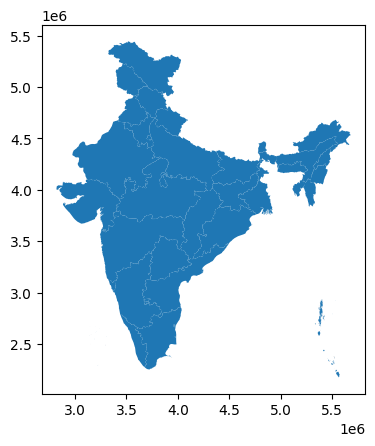

Total number of points in all geometries (including vertices of Polygons and LineStrings): 6531


<Axes: >

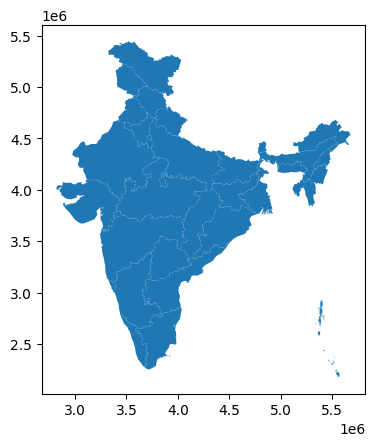

In [112]:
# Simplify the geometries (you can adjust the tolerance)
shapefile['geometry']=shapefile['geometry'].simplify(tolerance=1000, preserve_topology=True)
shapefile.plot()
plt.show()
num_points_in_all = shapefile.geometry.apply(lambda geom: len(geom.coords) if geom.geom_type == 'Point' else len(geom.exterior.coords) if geom.geom_type == 'Polygon' else 0).sum()
print(f"Total number of points in all geometries (including vertices of Polygons and LineStrings): {num_points_in_all}")
# Save the simplified shapefile
shapefile.to_file("INDIAN_STATE.shp")
#Check
gpd.read_file('INDIAN_STATE.shp').plot()


## DISTRICT

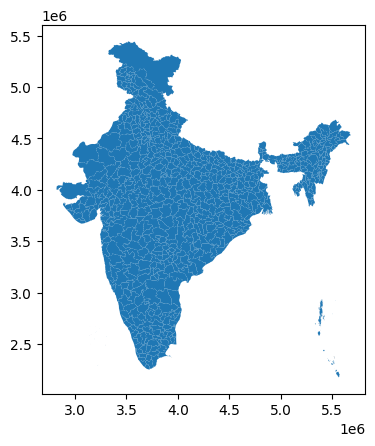

Total number of points in all geometries (including vertices of Polygons and LineStrings): 3370438


In [56]:
# Load your shapefile
dist = gpd.read_file("District\DISTRICT_BOUNDARY.shp")
dist.plot()
plt.show()
num_points_in_all = dist.geometry.apply(lambda geom: len(geom.coords) if geom.geom_type == 'Point' else len(geom.exterior.coords) if geom.geom_type == 'Polygon' else 0).sum()
print(f"Total number of points in all geometries (including vertices of Polygons and LineStrings): {num_points_in_all}")

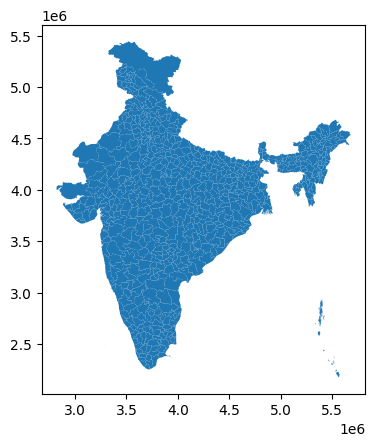

Total number of points in all geometries (including vertices of Polygons and LineStrings): 54264


<Axes: >

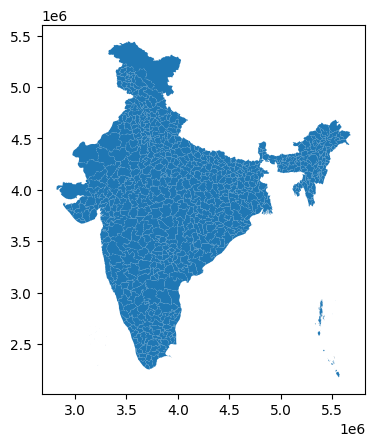

In [117]:
# Simplify the geometries (you can adjust the tolerance)
dist['geometry']=dist['geometry'].simplify(tolerance=1000, preserve_topology=True)
dist.plot()
plt.show()
num_points_in_all = dist.geometry.apply(lambda geom: len(geom.coords) if geom.geom_type == 'Point' else len(geom.exterior.coords) if geom.geom_type == 'Polygon' else 0).sum()
print(f"Total number of points in all geometries (including vertices of Polygons and LineStrings): {num_points_in_all}")
# Save the simplified dist
dist.to_file("INDIAN_DIST.shp")
#Check
gpd.read_file('INDIAN_DIST.shp').plot()


In [ ]:
import re
# Cleaning names and mapping state_LGD(codes)
st_d=dist[['State_LGD','STATE','DISTRICT_L','District']].drop_duplicates()
print(st_d.STATE.unique())
print(set(re.sub(r'[a-zA-Z&()-,- ]',r'',''.join(st_d.District.values))))
clean_map={">":"A","|":"I","@":"U"}
tr={}
_=[tr.update({ord(k):ord(v)}) for k,v in clean_map.items()]
st_d["STATE"]=st_d.STATE.str.translate(tr).str.upper()
st_d["District"]=st_d.District.str.translate(tr).str.upper()
print(st_d.STATE.unique())
print(set(re.sub(r'[a-zA-Z&()-,- ]',r'',''.join(st_d.District.values))))
print(set(re.sub(r'[a-zA-Z&()-,- ]',r'',''.join(st_d.STATE.values))))